In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [ ]:
# This model shows encoded images
encoder = Model(input_img, encoded)

# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))

# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


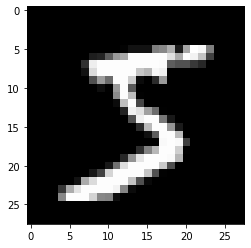

In [ ]:
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 14s 5ms/step - loss: 0.4245 - val_loss: 0.2238
Epoch 2/15
235/235 [==============================] - 1s 3ms/step - loss: 0.2130 - val_loss: 0.1855
Epoch 3/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1797 - val_loss: 0.1644
Epoch 4/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1626 - val_loss: 0.1547
Epoch 5/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1542 - val_loss: 0.1487
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1488 - val_loss: 0.1450
Epoch 7/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1455 - val_loss: 0.1426
Epoch 8/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1437 - val_loss: 0.1405
Epoch 9/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1417 - val_loss: 0.1386
Epoch 10/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1398 - val_loss: 0.137

In [ ]:
encoded_img = encoder.predict(x_test)

In [ ]:
decoded_img = decoder.predict(encoded_img)

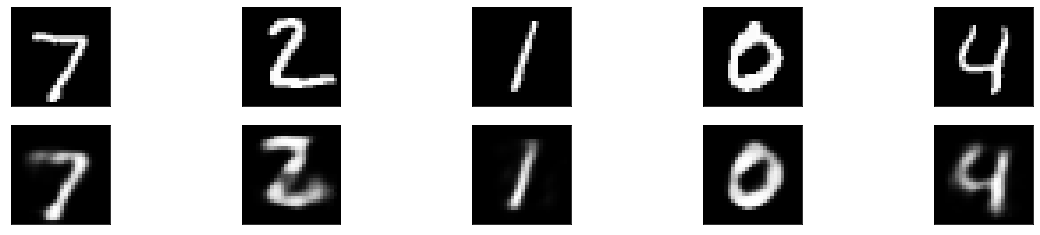

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))


In [ ]:
#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 15)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 15)          2040      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 30)        4

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 34s 8ms/step - loss: 0.2523 - val_loss: 0.0804
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0796 - val_loss: 0.0751
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0751 - val_loss: 0.0729
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0733 - val_loss: 0.0717
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0721 - val_loss: 0.0707
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0712 - val_loss: 0.0700
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0704 - val_loss: 0.0695
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0698 - val_loss: 0.0690
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0694 - val_loss: 0.0687
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0692 - val_loss: 0.068

In [ ]:
pred = model.predict(x_test)

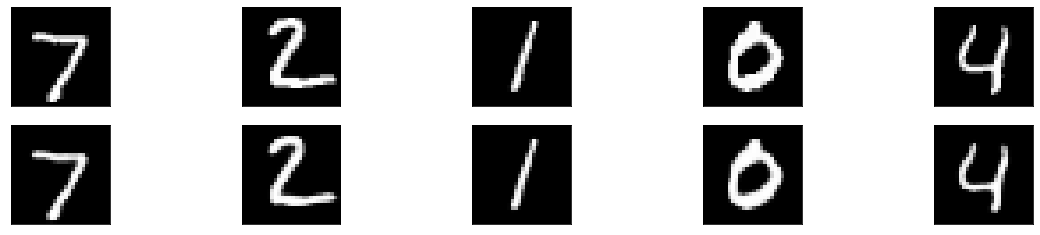

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### introduce noise in the images

In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

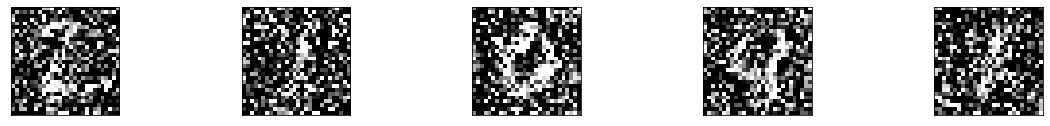

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [ ]:
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2868 - val_loss: 0.1554
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1522 - val_loss: 0.1439
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1439 - val_loss: 0.1394
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1398 - val_loss: 0.1363
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1370 - val_loss: 0.1348
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1351 - val_loss: 0.1327
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1338 - val_loss: 0.1315
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1322 - val_loss: 0.1301
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1308 - val_loss: 0.1302
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1297 - val_loss: 0.1282

In [ ]:
pred = model.predict(x_test_noisy)

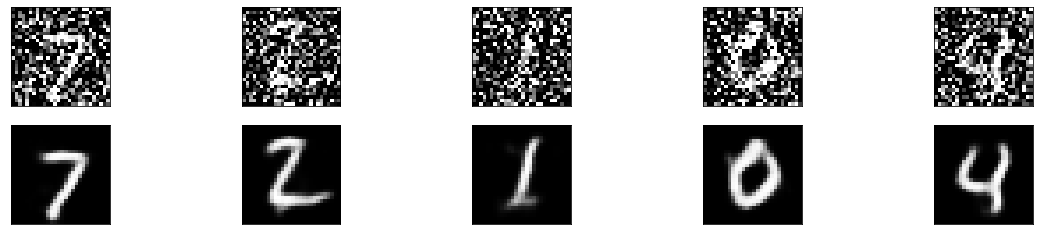

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()